In [3]:
! python -m pip install numpy matplotlib pandas scipy

  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached pandas-2.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! python -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Syftet:

Guldfynd är en butik som säljer smycken och accessoarer innehållande guld och silver. Nu har de möjlighet att utöka sitt sortiment med produkter som även innehåller diamanter. För att fatta ett beslut har de tillgång till ett dataset med information om alla diamanter.

Guldfynd har anlitat mig för att analysera datan åt dem med hjälp av Python. Jag kommer att undersöka om datan innehåller orimliga värden samt analysera vilka faktorer hos diamanten som påverkar priset mest. Målet med detta är att sedan ge mina insikter och rekommanadioner som kan stödja deras besult om att börja sälja produktet med diamanter.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Läser in diamant dataset.

In [61]:
df = pd.read_csv("data/diamonds.csv")

En översikt av vår diamant dataset. Vi kan se här att inga null-värden finns.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Hämtar fakta om våra numeriska värden i diamant-dataset.

In [63]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Hämtade ut de 20 första diamanterna i diamant-dataset

In [64]:
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Datatvätt

Vissa numeriska värden är 0, vilket är inte rimligt eller korrekt. Därför filtrerar jag bort dessa.

In [65]:
# Hämtar rader där x,y och z är 0.
zero_values = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print(zero_values)

       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20

In [66]:
#Filtrerar bort alla x, y och z har värdet 0.
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
print((df[['x', 'y','z']] == 0).sum())

x    0
y    0
z    0
dtype: int64


Skapade ett låddiagram för att få en bild på alla x-värden. Det högsta värdet(x=10.74mm) stack ut, men kändes måttmässigt rimligt. Därför valde jag att behålla den.

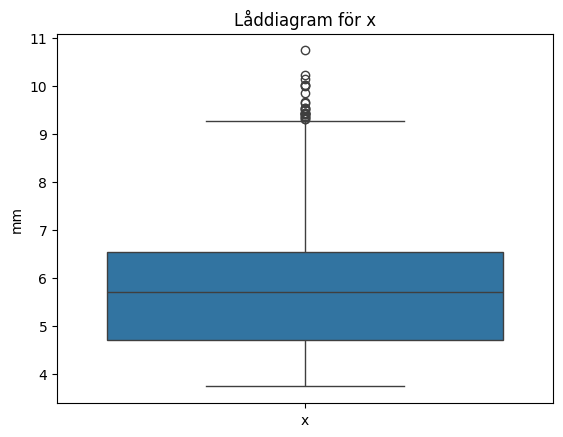

       carat   cut color clarity  depth  table  price      x      y     z
27415   5.01  Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98


In [67]:
#Ett låddiagram med x-värden.
x_value = ['x']

sns.boxplot(data=df[x_value])
plt.title("Låddiagram för x")
plt.ylabel('mm')
plt.show()

#Rimligt högsta värde
high_values = df[(df['x'] >= 10.74)]
print(high_values)

Skapade ett låddiagram för att få en bild på alla y-värden. De två högsta värdena(y = 31.8mm & y = 58.9) var extremt avvikande och orimliga i förhållande till övriga mått. Därför valde jag att filtrera bort dem.

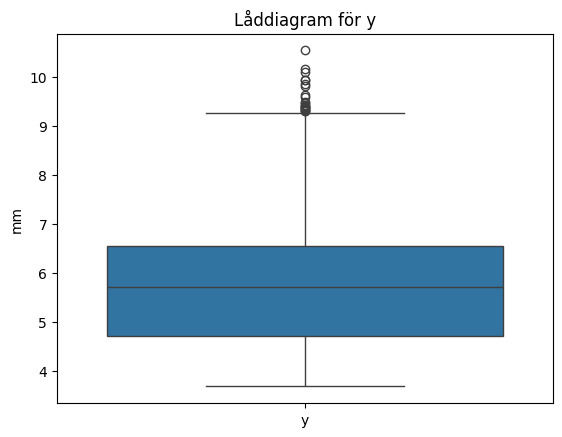

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [72]:
#Ett låddiagram med x-värden.
y_value = ['y']

sns.boxplot(data=df[y_value])
plt.title("Låddiagram för y")
plt.ylabel('mm')
plt.show()


high_values = df[(df['y'] >= 30.5)]
print(high_values)

#De högsta y-värden som är över 30mm är väldigt avvikande och orimliga
df = df[(df['y'] < 30)]

Skapade ett låddiagram för att få en bild av alla z-värden. Det högsta(z = 31.8mm) och lägsta värdet(z = 1.07mm) var avvikande och orimliga i förhållande till övriga mått. Därför valde jag att filtrera bort dem.

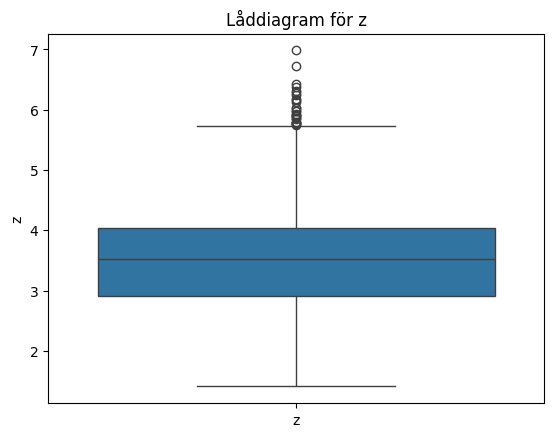

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [71]:
#Ett låddiagram med z-värden.
z_value = ['z']

sns.boxplot(data=df[z_value])
plt.title("Låddiagram för z")
plt.ylabel('z')
plt.show()

high_values = df[(df['z'] >= 30.5)]
print(high_values)

low_values = df[(df['z'] < 1.2)]
print(low_values)

df = df[(df['z'] < 31.8)]
df = df[(df['z'] > 1.2)]

Skapade ett låddiagram för att få en bild av alla depth-värden. De högsta(75%) och lägsta värdet(45%) var avvikande och orimliga. Därför valde jag att filtrera bort dem. Normalt depth brukar vara mellan 50% till 65%

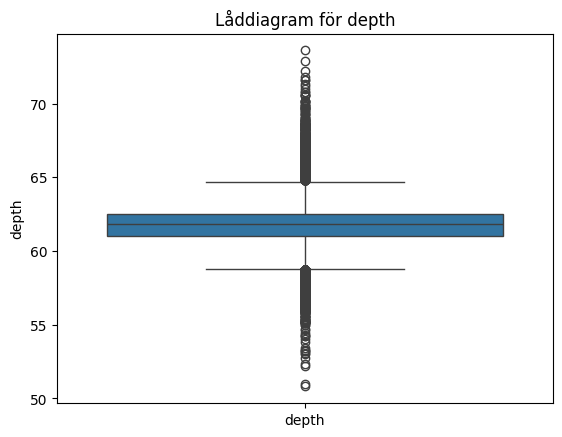

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [73]:
#Ett låddiagram med depth-värden.

depth = ['depth']

sns.boxplot(data=df[depth])
plt.title("Låddiagram för depth")
plt.ylabel('depth')
plt.show()

high_values = df[(df['depth'] >= 75)]
print(high_values)

low_values = df[(df['depth'] < 45)]
print(low_values)

df = df[(df['depth'] < 75)]
df = df[(df['depth'] > 45)]


Skapade ett låddiagram för att få en bild av alla table-värden. Värden över 80% och under 45% var avvikande och orimliga i förhållande till resten av data. Därför valde jag att filtrera bort dem. Normalt table-värden brukar vara mellan 50% till 70%

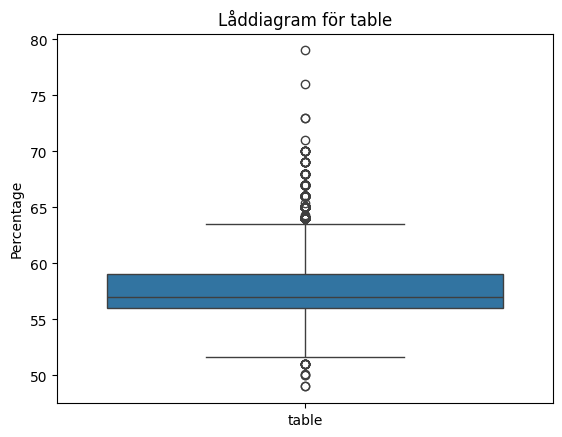

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [75]:
#Ett låddiagram med table-värden.
table = ['table']

sns.boxplot(data=df[table])
plt.title("Låddiagram för table")
plt.ylabel('Percentage')
plt.show()

high_values = df[(df['table'] > 80)]
print(high_values)
low_values = df[(df['table'] < 45)]
print(low_values)

df = df[(df['table'] < 80)]
df = df[(df['table'] > 45)]

Efter tvättning av värden följer punkterna den röda linjen som den ska. Ju högre volym desto högra karat.

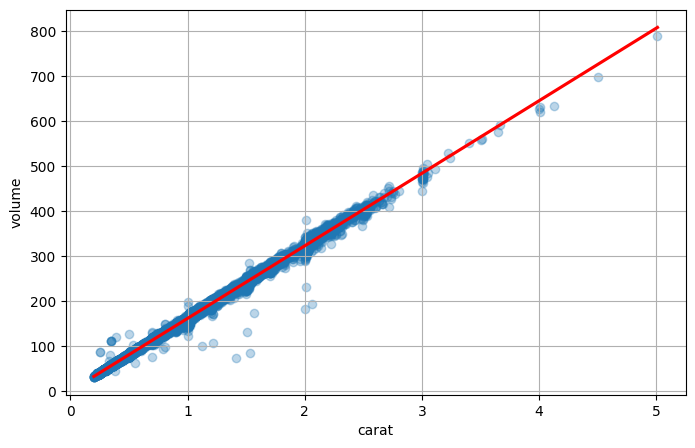

In [76]:
df['volume'] = df['x'] * df['y'] * df['z']

plt.figure(figsize = (8,5))
sns.regplot(x='carat', y='volume', data=df, scatter_kws={'alpha': 0.3},line_kws={'color':'red'})
plt.xlabel('carat')
plt.ylabel('volume')
plt.grid()
plt.show()

Analys: Vilka faktorer påverkar diamantpriset.

Jag skapade en korrelationsvärmekarta för att se vilka numeriska värden har störst påverkan på priset. De värden som ligger närmast 1 har starkast korrelation till priset och markeras med de varmaste färgerna.

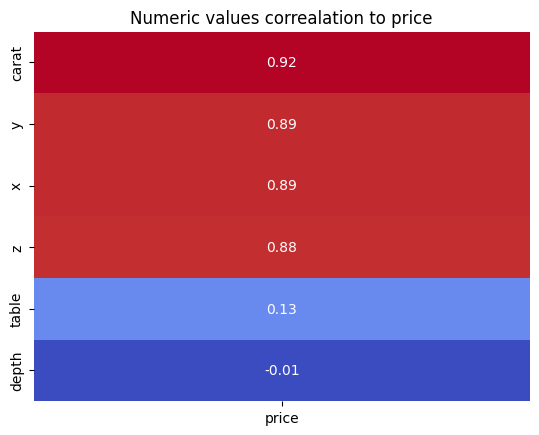

In [ ]:
#Ett korrelationsvärmekarta som visar viken numerisk storhet har störst påverkan på priset.
correaltion = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()

sorted = correaltion['price'].drop('price').sort_values(ascending=False)

sns.heatmap(sorted.to_frame(), annot=True, cmap='coolwarm', cbar=False)

plt.title("Numeric values correalation to price")
plt.show()

För att undersöka vilka kategoriska värden som påverkar priset mest skapade jag stapeldiagram för karat, färg, cut och clarity.

Enligt diagrammen var det endast karat som visade ett tydligt mönster diagrammen, ju högre karat desto högre pris, vilket är logiskt.
Övriga diagram var missvisande, exempelvis hade en bättre clarity ett lägre medelpris än den sämsta.

Detta tyder på karaten har en starkare påverkan på priset än de andra  kategoriska faktorerna.

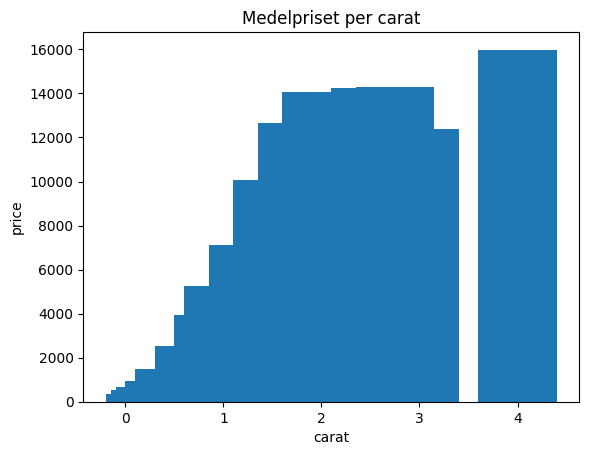

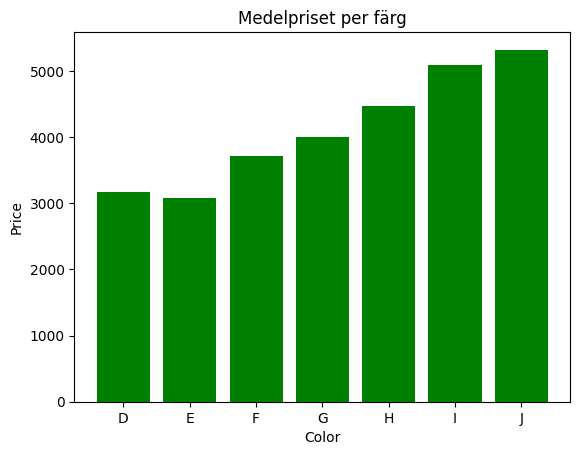

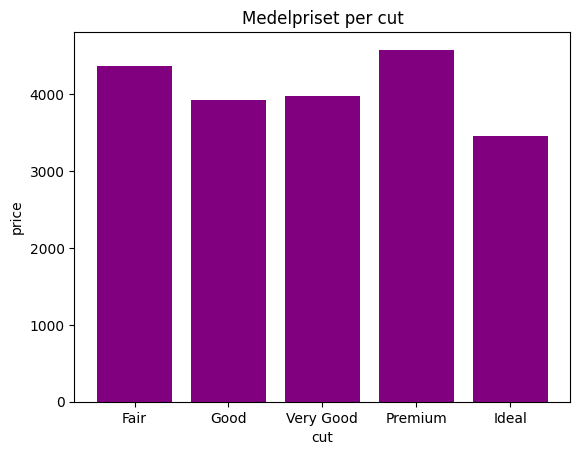

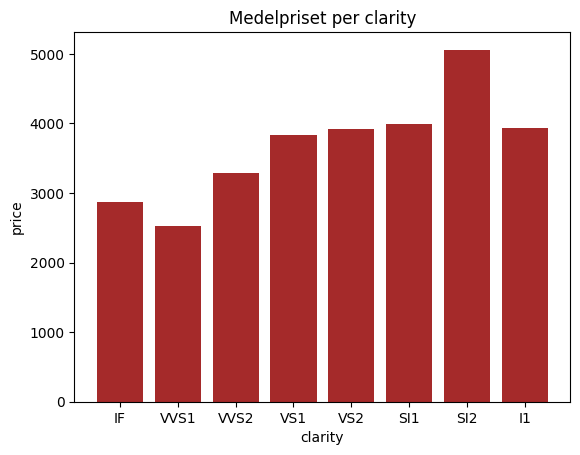

In [49]:
mean_price = df.groupby('carat')['price'].mean().reindex([0.05, 0.10, 0.20, 0.25, 0.30, 0.40, 0.50, 0.70, 0.90, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 2.75 ,3.00, 4.00, 5.00])
plt.bar(mean_price.index, mean_price.values)
plt.title("Medelpriset per carat")
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

mean_price = df.groupby('color')['price'].mean().reindex(['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.bar(mean_price.index, mean_price.values, color=['green'])
plt.title("Medelpriset per färg")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

mean_price = df.groupby('cut')['price'].mean().reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.bar(mean_price.index, mean_price.values, color=['purple'])
plt.title("Medelpriset per cut")
plt.xlabel("cut")
plt.ylabel("price")
plt.show()

mean_price = df.groupby('clarity')['price'].mean().reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.bar(mean_price.index, mean_price.values, color=['brown'])
plt.title("Medelpriset per clarity")
plt.xlabel("clarity")
plt.ylabel("price")
plt.show()


För att bekräfta att karat påverkade de kategoriska faktorerna och få en mer rättvis bild av deras påverkan. Filtrerarde jag diamanter till ett gemensamt karat-värde. Därefter skapade linjediagram för varje kategorisk faktor. Resultaten blev mer logiska.

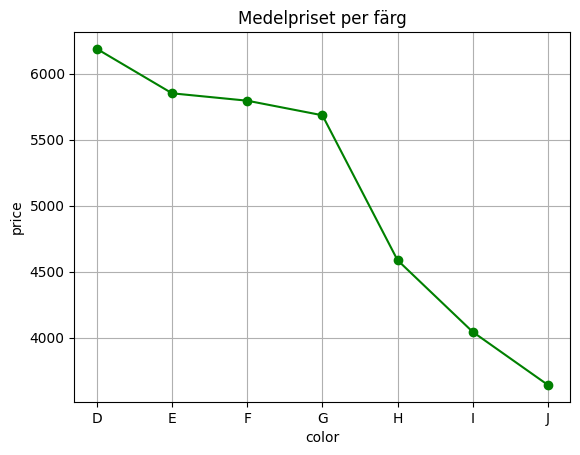

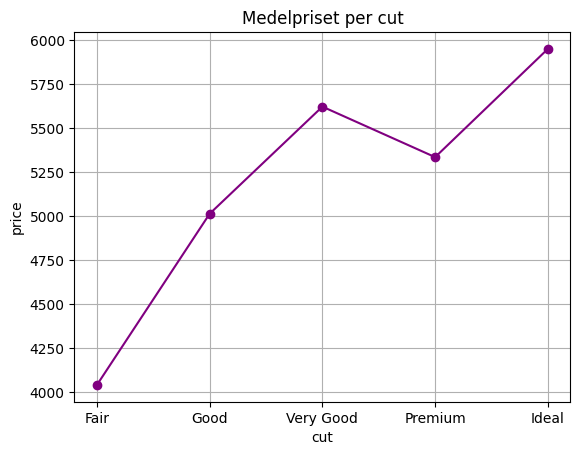

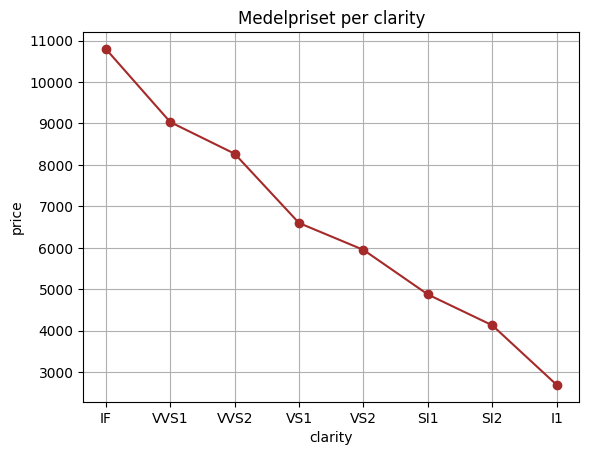

In [ ]:
same_karat = df[(df['carat'] >= 0.95) & (df['carat'] <= 1.05)]

mean_price = same_karat.groupby('color')['price'].mean().reindex(['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.plot(mean_price.index, mean_price.values, marker ='o', color='green')
plt.title("Medelpriset per färg")
plt.xlabel("color")
plt.ylabel("price")
plt.grid()
plt.show()

mean_price = same_karat.groupby('cut')['price'].mean().reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.plot(mean_price.index, mean_price.values, marker ='o', color='purple')
plt.title("Medelpriset per cut")
plt.xlabel("cut")
plt.ylabel("price")
plt.grid()
plt.show()

mean_price = same_karat.groupby('clarity')['price'].mean().reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])

plt.plot(mean_price.index, mean_price.values, marker ='o', color='brown')
plt.title("Medelpriset per clarity")
plt.xlabel("clarity")
plt.ylabel("price")
plt.grid()
plt.show()

Här skapade jag ett stapeldiagram för att visa vilka kategoriska faktorer som påverkar mest respektive och minst. Jag beräknade skillnaden i medelvärdet mellan det bästa och sämsta värdet för varje kategori. Högst prisökning har störst påverkan.

Prisökning(Color): 2545.723975018101
Prisökning(Cut): 1908.4605781865966
Prisökning(Clarity): 8105.307712384185


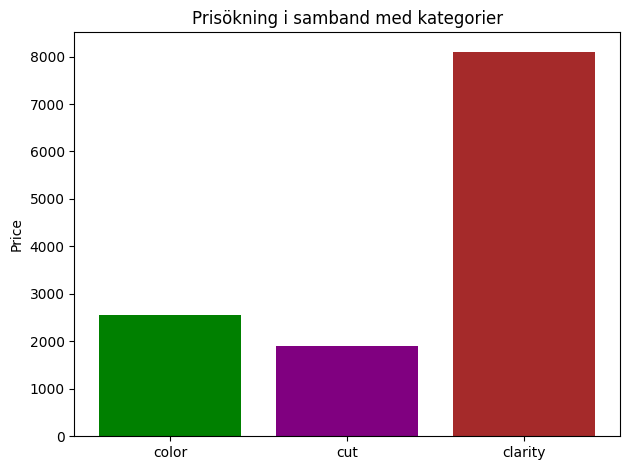

In [113]:
same_karat = df[(df['carat'] >= 0.95) & (df['carat'] <= 1.05)]

color_mean = same_karat.groupby('color')['price'].mean().reindex(['J', 'I', 'H', 'G', 'F', 'E', 'D'])
color_diff = color_mean['D'] - color_mean['J']
print(f"Prisökning(Color): {color_diff}")

cut_mean = same_karat.groupby('cut')['price'].mean().reindex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
cut_diff = cut_mean['Ideal'] - cut_mean['Fair']
print(f"Prisökning(Cut): {cut_diff}")

clarity_mean = same_karat.groupby('clarity')['price'].mean().reindex(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
clarity_diff = clarity_mean['IF'] - clarity_mean['I1']
print(f"Prisökning(Clarity): {clarity_diff}")

plt.bar(['color','cut','clarity'], [color_diff, cut_diff, clarity_diff], color=['green', 'purple', 'brown'])
plt.title("Prisökning i samband med kategorier")
plt.ylabel("Price")
plt.tight_layout()
plt.show()